In [12]:
#import all necessary libraries
import os

from pyspark.sql.functions import lit
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("review_and_category_analytics") \
    .config("spark.executor.memory", '8g') \
    .config('spark.executor.cores', '4') \
    .config('spark.cores.max', '4') \
    .config("spark.driver.memory",'8g') \
    .getOrCreate()

sc = spark.sparkContext

sqlCtx = SQLContext(sc)

## Create Pie Chart

In [2]:
#Load classification table
class_df = sqlCtx.read.\
    format("csv").\
    option("header", "true").\
    option("inferSchema", "true").\
    load("data/galaxyClasses.csv")

class_df.show(10)

+--------+------+----+------+
|GalaxyID|Smooth|Edge|Spiral|
+--------+------+----+------+
|  100008|     0|   0|     1|
|  100023|     0|   0|     1|
|  100053|     1|   0|     0|
|  100078|     1|   0|     0|
|  100090|     1|   0|     0|
|  100122|     1|   0|     0|
|  100123|     0|   0|     0|
|  100128|     1|   0|     0|
|  100134|     0|   0|     1|
|  100143|     0|   1|     0|
+--------+------+----+------+
only showing top 10 rows



In [24]:
#make data for pie chart

labels = ["Smooth", "Edge", "Spiral", "Other"]
count = []

count.append(
    class_df.where(F.col("Smooth") == 1).count()
)

count.append(
    class_df.where(F.col("Edge") == 1).count()
)

count.append(
    class_df.where(F.col("Spiral") == 1).count()
)

count.append(
    class_df.count()-count[0]-count[1]-count[2]
)

In [25]:
count

[25866, 6626, 15074, 14010]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

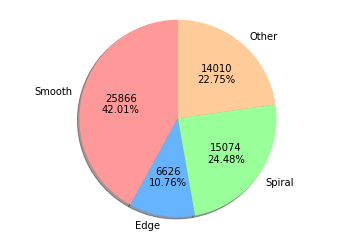

In [94]:
#Make pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot
#plt.pie(count, labels=labels, colors=colors,
#autopct='%1.1f%%', shadow=True, startangle = 90)

p, tx, autotexts = plt.pie(count, labels=labels, colors=colors,
        autopct="", shadow=True, startangle = 90)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(str(count[i]) + '\n' + str(round(count[i]/sum(count) * 100, 2)) + '%'))

plt.axis('equal')
plt.set_title("Proportion of Galaxy Types in Image Set")
plt.show()